### Imports 

In [82]:
import pandas as pd
import seaborn as sns
import plotly.express as px 

### Load data

In [83]:
! mkdir data
! curl https://storage.googleapis.com/schoolofdata-datasets/Data-Analysis.Data-Visualization/CO2_per_capita.csv > data/CO2_per_capita.csv
! ls  data

mkdir: data: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  411k  100  411k    0     0  1424k      0 --:--:-- --:--:-- --:--:-- 1430k
CO2_per_capita.csv


In [84]:
df = pd.read_csv("data/CO2_per_capita.csv",sep=";").dropna(subset="CO2 Per Capita (metric tons)")
df.head()


,Country Name,Country Code,Year,CO2 Per Capita (metric tons)
26,Aruba,ABW,1986,2.868319
27,Aruba,ABW,1987,7.234964
28,Aruba,ABW,1988,10.026508
29,Aruba,ABW,1989,10.634733
30,Aruba,ABW,1990,29.620165


In [85]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10599 entries, 26 to 12895
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country Name                  10599 non-null  object 
 1   Country Code                  10599 non-null  object 
 2   Year                          10599 non-null  int64  
 3   CO2 Per Capita (metric tons)  10599 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 414.0+ KB


,Year,CO2 Per Capita (metric tons)
count,10599.000000,10599.000000
mean,1986.793848,4.314893
std,15.062262,7.186523
min,1960.000000,0.000580
25%,1974.000000,0.413003
50%,1988.000000,1.590776
75%,2000.000000,6.007173
max,2011.000000,99.840439


(0, 2)


<Axes: >

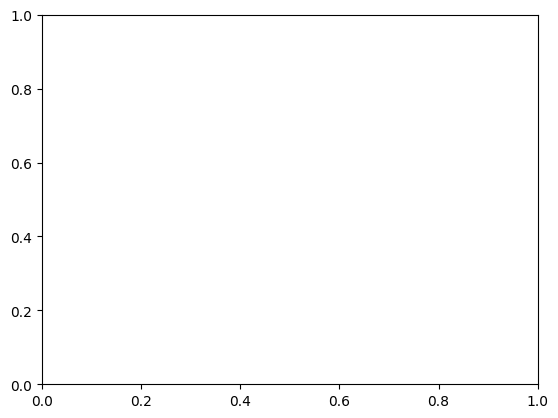

In [86]:
# Bonus :  COmbien de nan par pays ?
nan_df = df.loc[:,["Country Name"]].copy()
nan_df["CO2"] = df.loc[:,["CO2 Per Capita (metric tons)"]].isna()
nan_df = nan_df.groupby("Country Name").sum().sort_values(by="CO2",ascending=False)
nan_df = nan_df[nan_df["CO2"] > 0 ]
nan_df.reset_index(inplace=True)
print(nan_df.shape)
sns.barplot(data=nan_df, x= "Country Name", y="CO2")

<Axes: xlabel='CO2 Per Capita (metric tons)', ylabel='Count'>

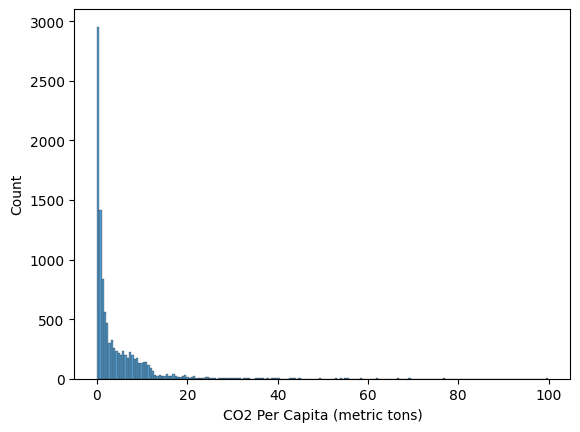

In [87]:
sns.histplot(df,x="CO2 Per Capita (metric tons)")

In [88]:
df.tail()

,Country Name,Country Code,Year,CO2 Per Capita (metric tons)
12891,Zimbabwe,ZWE,2007,0.731867
12892,Zimbabwe,ZWE,2008,0.569255
12893,Zimbabwe,ZWE,2009,0.600521
12894,Zimbabwe,ZWE,2010,0.646073
12895,Zimbabwe,ZWE,2011,0.691698


In [89]:
boolean_df = (df["Year"] > 2008) & (df["Year"] < 2011)
filtered_df = df[boolean_df]
filtered_df

,Country Name,Country Code,Year,CO2 Per Capita (metric tons)
49,Aruba,ABW,2009,24.876706
50,Aruba,ABW,2010,24.182702
101,Afghanistan,AFG,2009,0.249074
102,Afghanistan,AFG,2010,0.302936
153,Angola,AGO,2009,1.430873
...,...,...,...,...
12790,South Africa,ZAF,2010,8.957154
12841,Zambia,ZMB,2009,0.184058
12842,Zambia,ZMB,2010,0.192079
12893,Zimbabwe,ZWE,2009,0.600521


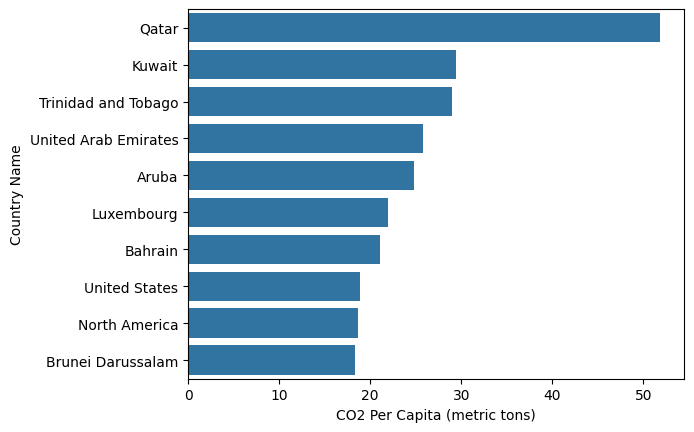

In [100]:
def top_n_emitters( df : pd.DataFrame
                    ,start_year : int = 2008
                    ,end_year   : int = 2011
                    ,nb_display : int = 10)  :
    # Je filtre par années
    boolean_df = (df["Year"] >= start_year) & (df["Year"] <= end_year )
    filtered_df = df[boolean_df]
    # Je groupe 
    co2_df = filtered_df[["Country Name","CO2 Per Capita (metric tons)"]]\
                    .groupby(by="Country Name")\
                    .mean()
    # Je filtre le top n
    co2_df\
        .sort_values(by='CO2 Per Capita (metric tons)'
                       ,inplace=True
                       ,ascending=False)
    top_n_co2 = co2_df.head(nb_display)
    # 3 je créé un graph
    sns.barplot(top_n_co2, y=top_n_co2.index, x = "CO2 Per Capita (metric tons)")

    
top_n_emitters(df,2000,2020,10)

In [91]:
top_n_emitters

<function __main__.top_n_emitters(df: pandas.core.frame.DataFrame, start_year: int = 2008, end_year: int = 2011, nb_display: int = 10)>